In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect, string
import re
import csv
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [52]:
import os
from scipy.io import wavfile
import scipy.signal
from src.dataset_getters import *
from src.plot_utils import *
from src.draft import *

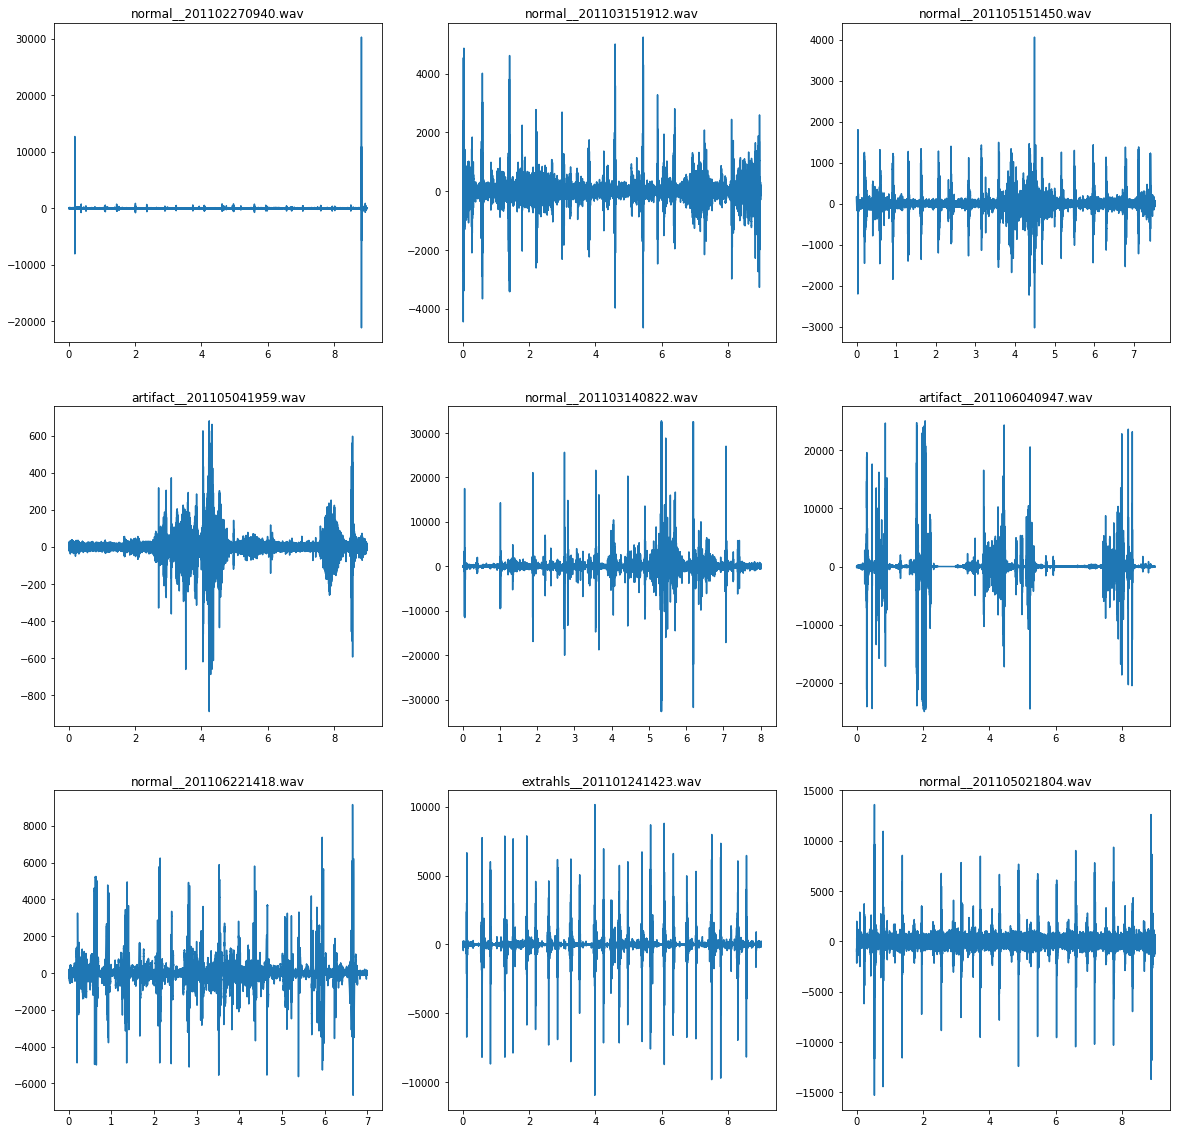

In [4]:
data_dir_path = get_kaggle_audio_dir_path('a')
paths = get_random_file_paths(9, data_dir_path)
plot_signals_on_square_grid(paths, 3, 20)

In [43]:
path = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_a/normal__201103151912.wav'
path1 = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_b/murmur__239_1309195730333_C.wav'
path2 = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_a/extrahls__201102241217.wav'
path3 = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_a/murmur__201108222243.wav'
path4 = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/physionet/set_a/a0007.wav'

In [48]:
fs, signal = wavfile.read(path4)

In [27]:
fsmurmur, signalmurmur = wavfile.read(path3)

In [36]:
desired_signal_length = int((len(signal) / fs) * 2000)
time = np.linspace(0, int((len(signal) / fs)), len(signal))
desired_signal_length

41518

In [37]:
decimated = scipy.signal.decimate(signal, 22)
downsampled = scipy.signal.resample(signal, desired_signal_length)

0


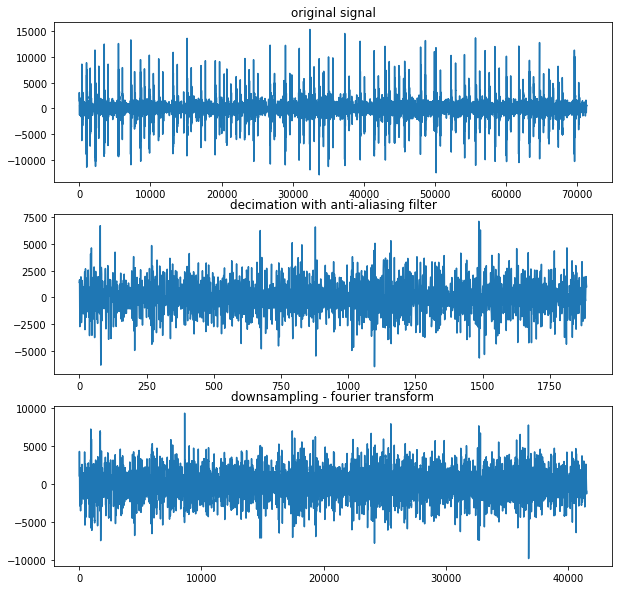

In [49]:
grid_size=2
figsize = 10
indices = list(product(list(range(grid_size)), repeat=2))
print(indices[0][0])
f, ax = plt.subplots(3, 1, figsize=(figsize, figsize))
ax[0].plot(signal)
ax[0].set_title('original signal')
ax[1].plot(decimated)
ax[1].set_title('decimation with anti-aliasing filter')
ax[2].plot(downsampled)
ax[2].set_title('downsampling - fourier transform')

plt.show()

In [39]:
def get_chunks(file_path):
    sampling_rate, signal = wavfile.read(file_path)
    audio_length = len(signal) // sampling_rate
    return [signal[i * sampling_rate:(i + 1) * sampling_rate] for i in range(0, audio_length)]

0


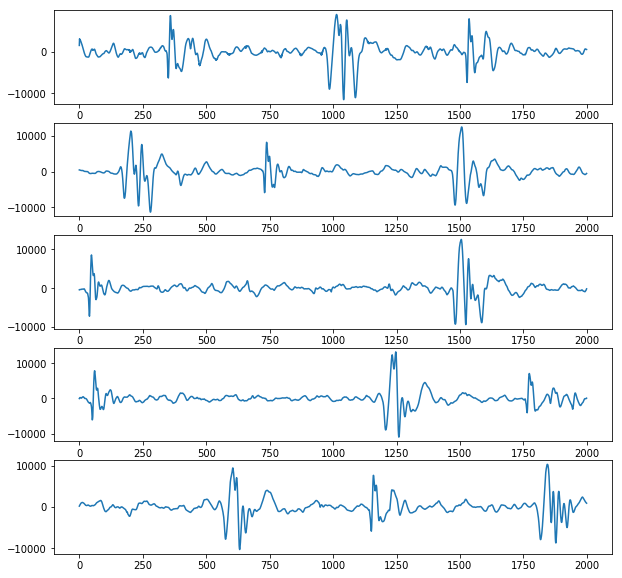

In [53]:
chunks = get_chunks(path4)
grid_size=2
figsize = 10
indices = list(product(list(range(grid_size)), repeat=2))
print(indices[0][0])
f, ax = plt.subplots(5, 1, figsize=(figsize, figsize))
ax[0].plot(chunks[0])
# ax[0].set_title('original signal')
ax[1].plot(chunks[1])
# ax[1].set_title('decimation with anti-aliasing filter')
ax[2].plot(chunks[2])
ax[3].plot(chunks[3])
ax[4].plot(chunks[4])


# ax[2].set_title('downsampling - fourier transform')

plt.show()

0


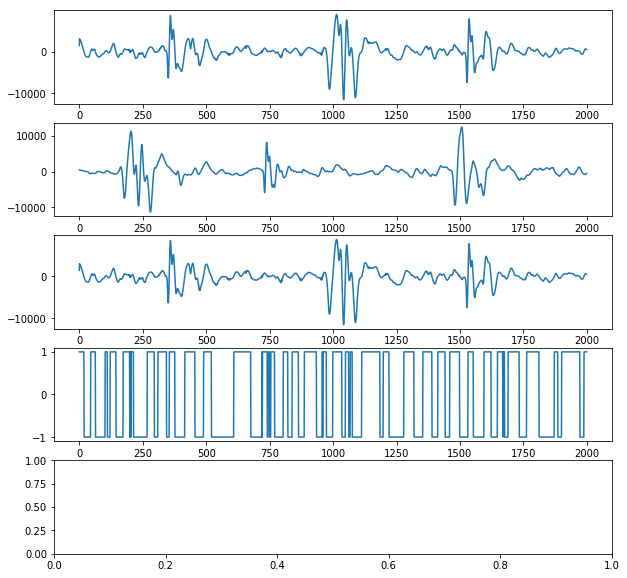

In [61]:
from sklearn import preprocessing
chunks1 = get_chunks(path4)
chunks1 = downsample_chunks(chunks)
chunk = chunks1[0].reshape(-1, 1)
chunk_normalized = preprocessing.normalize(chunk, norm='l2')
grid_size=2
figsize = 10
indices = list(product(list(range(grid_size)), repeat=2))
print(indices[0][0])
f, ax = plt.subplots(5, 1, figsize=(figsize, figsize))
ax[0].plot(chunks1[0])
# ax[0].set_title('original signal')
ax[1].plot(chunks1[1])
# ax[1].set_title('decimation with anti-aliasing filter')
ax[2].plot(chunk)
ax[3].plot(chunk_normalized)
# ax[4].plot(chunks1[4])


# ax[2].set_title('downsampling - fourier transform')

plt.show()

In [69]:
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt

Mean: -7.641660, StandardDeviation: 5814.816226


/home/justyna/virtualenvs/heartbeat_env/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(1, 349958)

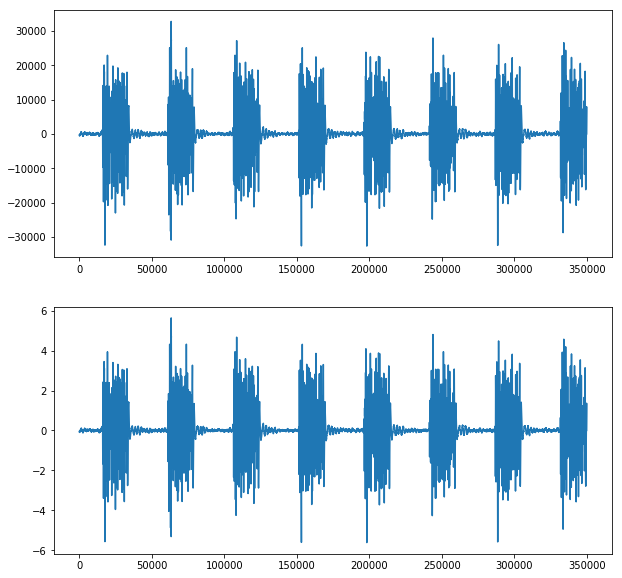

In [105]:
fs, signal = wavfile.read(path3)
series = pd.Series(signal)
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
f, ax = plt.subplots(2, 1, figsize=(figsize, figsize))
ax[0].plot(signal)
ax[1].plot(normalized)
normalized = normalized.T
normalized.shape

In [98]:
a = np.array([1,0,0])
print((a[0] - np.mean(a)) / np.std(a))
print((a[1] - np.mean(a)) / np.std(a))
print((a[2] - np.mean(a)) / np.std(a))

1.4142135623730951
-0.7071067811865475
-0.7071067811865475


In [96]:
b = np.array([3,2,-1])
print((b[0] - np.mean(b)) / np.std(b))
print((b[1] - np.mean(b)) / np.std(b))
print((b[2] - np.mean(b)) / np.std(b))

0.9805806756909202
0.3922322702763681
-1.372812945967288


In [101]:
a = [[1,2,3], [1,2,3]]
b = [[1,2,3], [1,2,3]]
a == b

True